In [412]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading in csv with column names
colnames = ['age', 'workclass','fnlwgt','education','education-num','marital_status','occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country','over_50k']
adult = pd.read_csv('adult.csv', header = None, index_col = None, names = colnames)

#dropping blank values and two columns
adult.replace(' ?',np.nan,inplace=True)
adult = adult.dropna(axis = 0, how = 'any')
adult = adult.drop(['fnlwgt','education-num'],axis = 1)
adult = adult.reset_index(drop = True)
for col in ['workclass', 'education', 'marital_status','occupation','relationship','race','sex', 'native_country', 'over_50k']:
    adult[col] = adult[col].str.strip()


# replacing workclass groups
adult.loc[np.logical_or(adult.loc[:,'workclass'] == 'Self-emp-not-inc', adult.loc[:,'workclass'] == 'Self-emp-inc'),'workclass'] = 'Self-Employed'

#replacing education groups
adult.loc[np.logical_or(adult.loc[:,'education'] == 'Assoc-acdm', adult.loc[:,'education'] == 'Assoc-voc'),'education'] = 'Associates'
adult.loc[np.logical_or.reduce((adult.loc[:,'education'] == '11th', adult.loc[:,'education'] == '9th',\
                               adult.loc[:,'education'] == '7th-8th',adult.loc[:,'education'] == '5th-6th',
                               adult.loc[:,'education'] == '10th', adult.loc[:,'education'] == '12th',\
                               adult.loc[:,'education'] == '1st-4th', adult.loc[:,'education'] == 'Preschool')),'education'] = 'Below-HS'
adult.loc[adult.loc[:,'education'] == 'Some-college','education'] = 'HS-grad'

#replacing marital status groups
adult.loc[np.logical_or.reduce((adult.loc[:,'marital_status']== "Divorced",adult.loc[:,'marital_status']== 'Separated', \
                                adult.loc[:,'marital_status']== "Married-spouse-absent")),'marital_status'] = 'Not-married'
adult.loc[np.logical_or.reduce((adult.loc[:,'marital_status']== "Married-civ-spouse",adult.loc[:,'marital_status']== 'Married-AF-spouse'\
                                )),'marital_status'] = 'Married'
adult.head(10)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,Below-HS,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,Below-HS,Not-married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-Employed,HS-grad,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## What is the proportion of people earning under 50K?

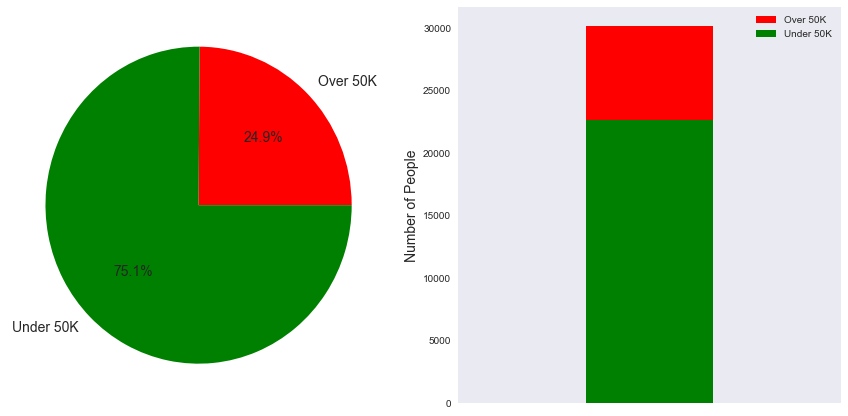

In [220]:
totalCount = len(adult)
under50 = len(adult.loc[adult['over_50k'] == '<=50K'])
over50 = totalCount - under50
fracs = [over50, under50]
colors = ['r', 'g']

plt.rcParams['font.size'] = 14
fig,axes = plt.subplots(1,2,figsize =[12,6])
patches,texts,autotexts = axes[0].pie(fracs, colors = colors, labels = ['Over 50K', 'Under 50K'], autopct = '%1.1f%%')
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

bar_width = .1
axes[1].bar(1,fracs[0],width = bar_width, label = 'Over 50K', color = 'r',bottom = fracs[1])
axes[1].bar(1,fracs[1],width = bar_width, label = "Under 50K", color = 'g')
axes[1].xaxis.set_visible(False)
axes[1].set_xlim(.85,1.15)
axes[1].set_ylabel('Number of People')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels)
axes[1].grid(False)

fig.tight_layout()
plt.show()


### Knowing the proportion of each category is useful since it can serve as a baseline for the performance of a predictive model. Predicting all subjects as under $50K would result in 75% accuracy. 

## What is the breakdown of education level in the population? In each income group?

In [270]:
def find_bottom(listOfThings,count):
    if count!=0:
        return listOfThings[count-1]+find_bottom(listOfThings,count-1)
    else:
        return 0

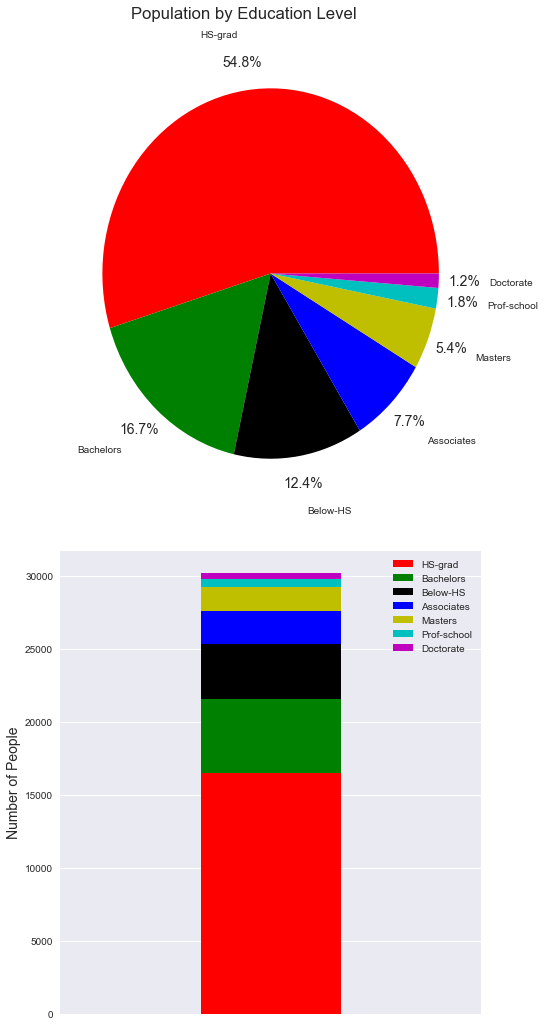

In [427]:
fracsEdu = list(adult['education'].value_counts())
valuesEdu = list(adult['education'].value_counts().index)
colorsE = ['r','g','k','b','y','c','m']
figE,axesE = plt.subplots(2,1,figsize =[7,14])
patches,texts,autotexts = axesE[0].pie(fracsEdu, labels = valuesEdu, colors = colorsE, autopct = '%1.1f%%', pctdistance=1.15, labeldistance = 1.3)

bar_width = .1
for x in range(len(fracsEdu)):
    axesE[1].bar(1,fracsEdu[x],width = bar_width, label = valuesEdu[x], color = colorsE[x], bottom = find_bottom(fracsEdu,x))
axesE[1].xaxis.set_visible(False) 
axesE[1].set_xlim(.85,1.15)
axesE[1].set_ylabel('Number of People')
handles, labels = axesE[1].get_legend_handles_labels()
axesE[1].legend(handles, labels)


figE.tight_layout()
figE.subplots_adjust(hspace=.1)
figE.suptitle('Population by Education Level', y = 1.02)
plt.show()


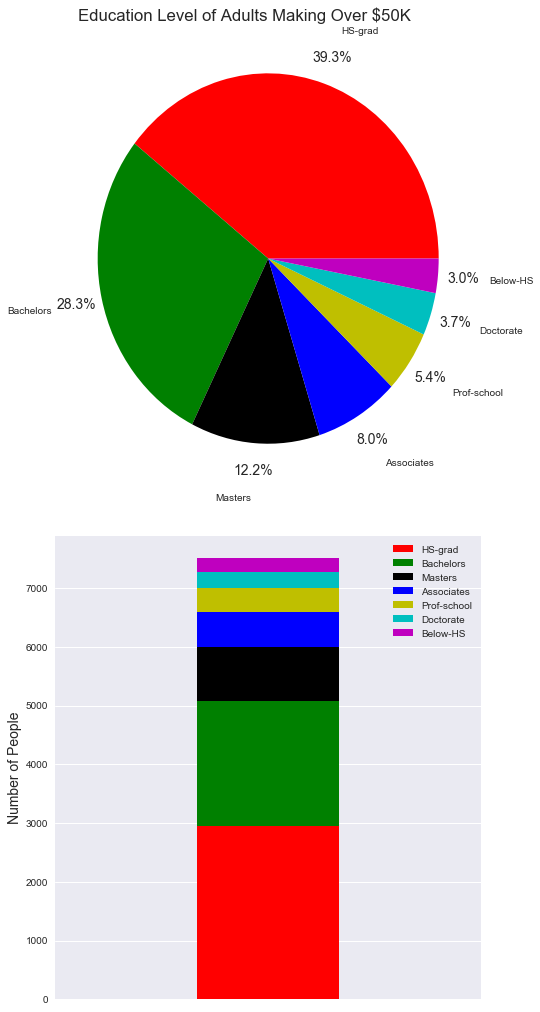

In [430]:
fracsOverEdu = list(adult[adult['over_50k'] == '>50K']['education'].value_counts())
valuesOverEdu = list(adult[adult['over_50k'] == '>50K']['education'].value_counts().index)
figOE, axesOE = plt.subplots(2,1,figsize = [7,14])
patches,texts,autotexts = axesOE[0].pie(fracsOverEdu, labels = valuesOverEdu, colors = colorsE, autopct = '%1.1f%%', pctdistance=1.15, labeldistance = 1.3)

bar_width = .1
for x in range(len(fracsOverEdu)):
    axesOE[1].bar(1,fracsOverEdu[x],width = bar_width, label = valuesOverEdu[x], color = colorsE[x], bottom = find_bottom(fracsOverEdu,x))
axesOE[1].xaxis.set_visible(False) 
axesOE[1].set_xlim(.85,1.15)
axesOE[1].set_ylabel('Number of People')
handles, labels = axesOE[1].get_legend_handles_labels()
axesOE[1].legend(handles, labels)

figOE.tight_layout()
figOE.subplots_adjust(hspace=.1)
figOE.suptitle('Education Level of Adults Making Over $50K', y = 1.005)
plt.show()

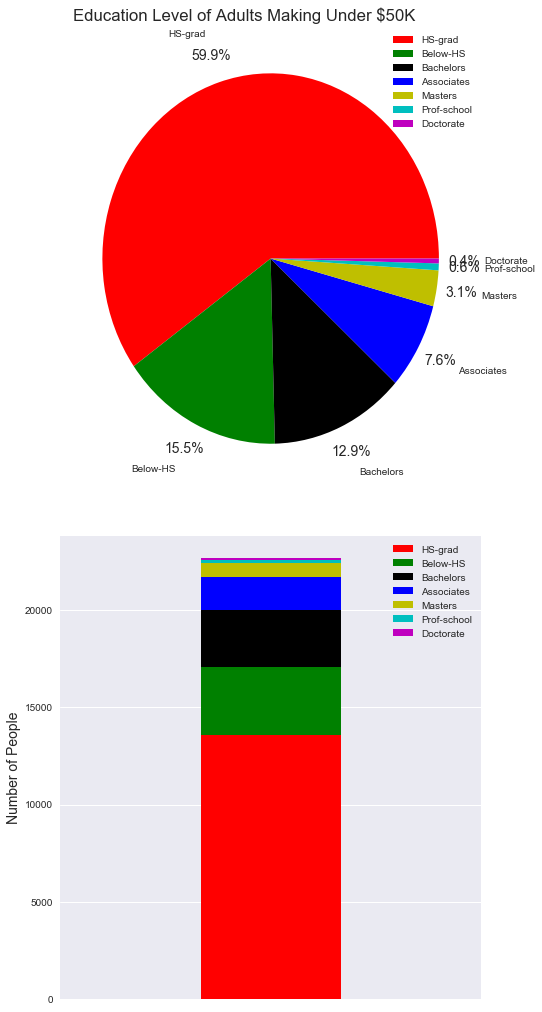

In [431]:
fracsUnderEdu = list(adult[adult['over_50k'] == '<=50K']['education'].value_counts())
valuesUnderEdu = list(adult[adult['over_50k'] == '<=50K']['education'].value_counts().index)
figUE, axesUE = plt.subplots(2,1,figsize = [7,14])
patches,texts,autotexts = axesUE[0].pie(fracsUnderEdu, labels = valuesUnderEdu, autopct = '%1.1f%%', colors = colorsE, pctdistance=1.15, labeldistance = 1.27)
andles, labels = axesUE[0].get_legend_handles_labels()
axesUE[0].legend(handles, labels)

bar_width = .1
for x in range(len(fracsUnderEdu)):
    axesUE[1].bar(1,fracsUnderEdu[x],width = bar_width, label = valuesUnderEdu[x], color = colorsE[x], bottom = find_bottom(fracsUnderEdu,x))
axesUE[1].xaxis.set_visible(False) 
axesUE[1].set_xlim(.85,1.15)
axesUE[1].set_ylabel('Number of People')
handles, labels = axesUE[1].get_legend_handles_labels()
axesUE[1].legend(handles, labels)

figUE.tight_layout()
figUE.subplots_adjust(hspace=.1)
figUE.suptitle('Education Level of Adults Making Under $50K', y = 1.005)
plt.show()

### We can break down each education level into the two income categories to see how effective a prediction would be using solely income level.

In [433]:
eduLevel={}
for ind in adult[adult['over_50k'] == '>50K']['education'].value_counts().index:
    eduLevel[ind] = adult[adult['education'] == ind]['over_50k'].value_counts()
eduLeveldf = pd.DataFrame(eduLevel)
eduLeveldf = eduLeveldf.append(eduLeveldf.iloc[0,:]/(eduLeveldf.iloc[0,:]+eduLeveldf.iloc[1,:]),ignore_index=True)
eduLeveldf = eduLeveldf.transpose()
eduLeveldf[[0,1]]=eduLeveldf[[0,1]].astype(int)
eduLeveldf[2] = round(eduLeveldf[2]*100,1)
eduLeveldf = eduLeveldf.sort_values(2, ascending = False)
eduLeveldf.columns = ['Under 50K', 'Over 50K', '% under 50K']
eduLeveldf

,Under 50K,Over 50K,% under 50K
Below-HS,3516,225,94.0
HS-grad,13565,2953,82.1
Associates,1715,600,74.1
Bachelors,2918,2126,57.9
Masters,709,918,43.6
Doctorate,95,280,25.3
Prof-school,136,406,25.1


### If we predict based solely on education, our results could potentially be as follows:

In [405]:
eduLeveldf.iloc[0:4,0].sum() / eduLeveldf[['Under 50K','Over 50K']].sum().sum()

0.71991247264770242

### Though we are correct 72% of the time, this result is worse than guessing everyone earns below $50K. Even though education is a very important factor (for instance, the 'Below-HS' group can be predicted with 94% accuracy using only education), it is not sufficient to obtain a good result.

## What is the breakdown of marital status? 

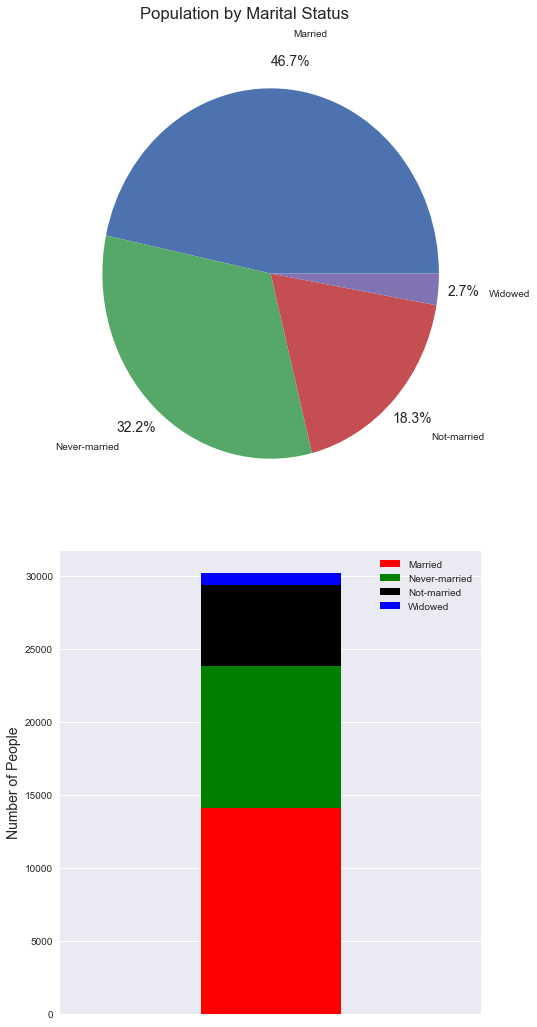

In [423]:
fracsM = list(adult['marital_status'].value_counts())
valuesM = list(adult['marital_status'].value_counts().index)
colorsM = ['r','g','k','b','y','c','m']
figM,axesM = plt.subplots(2,1,figsize =[7,14])
patches,texts,autotexts = axesM[0].pie(fracsM, labels = valuesM, autopct = '%1.1f%%', pctdistance=1.15, labeldistance = 1.3)

bar_width = .1
for x in range(len(fracsM)):
    axesM[1].bar(1,fracsM[x],width = bar_width, label = valuesM[x], color = colorsM[x], bottom = find_bottom(fracsM,x))
axesM[1].xaxis.set_visible(False) 
axesM[1].set_xlim(.85,1.15)
axesM[1].set_ylabel('Number of People')
handles, labels = axesM[1].get_legend_handles_labels()
axesM[1].legend(handles, labels)

figM.tight_layout()
figM.subplots_adjust(hspace=.1)
figM.suptitle('Population by Marital Status', y = 1.02)
plt.show()

In [434]:
mStatus={}
for ind in adult[adult['over_50k'] == '>50K']['marital_status'].value_counts().index:
    mStatus[ind] = adult[adult['marital_status'] == ind]['over_50k'].value_counts()
mStatusdf = pd.DataFrame(mStatus)
mStatusdf = mStatusdf.append(mStatusdf.iloc[0,:]/(mStatusdf.iloc[0,:]+mStatusdf.iloc[1,:]),ignore_index=True)
mStatusdf = mStatusdf.transpose()
mStatusdf[[0,1]]=mStatusdf[[0,1]].astype(int)
mStatusdf[2] = round(mStatusdf[2]*100,1)
mStatusdf = mStatusdf.sort_values(2, ascending = False)
mStatusdf.columns = ['Under 50K', 'Over 50K', '% under 50K']
mStatusdf

,Under 50K,Over 50K,% under 50K
Never-married,9256,470,95.2
Widowed,747,80,90.3
Not-married,4974,549,90.1
Married,7677,6409,54.5


### This result is very notable since over 90% of the Never-married, Widowed, and Not-married categories have earners under $50K. I expect this is the case since the income considered is the entire household income. Married couples can count two incomes to meet the threshold.

## How is the population segmented by occupation?

In [443]:
occupation={}
for ind in adult[adult['over_50k'] == '>50K']['occupation'].value_counts().index:
    occupation[ind] = adult[adult['occupation'] == ind]['over_50k'].value_counts()
occupationdf = pd.DataFrame(occupation)
occupationdf = occupationdf.append(occupationdf.iloc[0,:]/(occupationdf.iloc[0,:]+occupationdf.iloc[1,:]),ignore_index=True)
occupationdf = occupationdf.transpose()
occupationdf[[0,1]]=occupationdf[[0,1]].astype(int)
occupationdf[2] = round(occupationdf[2]*100,1)
occupationdf = occupationdf.sort_values(2, ascending = False)
occupationdf.columns = ['Under 50K', 'Over 50K', '% under 50K']
occupationdf

,Under 50K,Over 50K,% under 50K
Priv-house-serv,142,1,99.3
Other-service,3080,132,95.9
Handlers-cleaners,1267,83,93.9
Armed-Forces,8,1,88.9
Farming-fishing,874,115,88.4
Machine-op-inspct,1721,245,87.5
Adm-clerical,3223,498,86.6
Transport-moving,1253,319,79.7
Craft-repair,3122,908,77.5
Sales,2614,970,72.9


### Though there are some categories of occupations that serve as strong predictors, the large variety of categories with percentages between 50% and 80% show that occupation is not a particularly strong predictor on its own.


## What is the population segmented by relationship?

In [450]:
relationship={}
for ind in adult[adult['over_50k'] == '>50K']['relationship'].value_counts().index:
    relationship[ind] = adult[adult['relationship'] == ind]['over_50k'].value_counts()
relationshipdf = pd.DataFrame(relationship)
relationshipdf = relationshipdf.append(relationshipdf.iloc[0,:]/(relationshipdf.iloc[0,:]+relationshipdf.iloc[1,:]),ignore_index=True)
relationshipdf = relationshipdf.transpose()
relationshipdf[[0,1]]=relationshipdf[[0,1]].astype(int)
relationshipdf[2] = round(relationshipdf[2]*100,1)
relationshipdf = relationshipdf.sort_values(2, ascending = False)
relationshipdf.columns = ['Under 50K', 'Over 50K', '% under 50K']
relationshipdf

,Under 50K,Over 50K,% under 50K
Own-child,4402,64,98.6
Other-relative,854,35,96.1
Unmarried,2999,213,93.4
Not-in-family,6903,823,89.3
Husband,6784,5679,54.4
Wife,712,694,50.6


### Once again, we observe that non-married individuals earn under $50K a vast majority of the time. The 'relationship' attribute could possibly be discarded due to its similarity to marital state.

## How is the population segmented by race?

In [458]:
race={}
for ind in adult[adult['over_50k'] == '>50K']['race'].value_counts().index:
    race[ind] = adult[adult['race'] == ind]['over_50k'].value_counts()
racedf = pd.DataFrame(race)
racedf = racedf.append(racedf.iloc[0,:]/(racedf.iloc[0,:]+racedf.iloc[1,:]),ignore_index=True)
racedf = racedf.transpose()
racedf[[0,1]]=racedf[[0,1]].astype(int)
racedf[2] = round(racedf[2]*100,1)
racedf = racedf.sort_values(2, ascending = False)
racedf.columns = ['Under 50K', 'Over 50K', '% under 50K']
racedf

,Under 50K,Over 50K,% under 50K
Other,210,21,90.9
Amer-Indian-Eskimo,252,34,88.1
Black,2451,366,87.0
White,19094,6839,73.6
Asian-Pac-Islander,647,248,72.3


### The race segmentation is not the most useful since all ethnic groups listed have a majority of individuals earning less than $50K.

## How is the population segmented by sex?

In [459]:
sex={}
for ind in adult[adult['over_50k'] == '>50K']['sex'].value_counts().index:
    sex[ind] = adult[adult['sex'] == ind]['over_50k'].value_counts()
sexdf = pd.DataFrame(sex)
sexdf = sexdf.append(sexdf.iloc[0,:]/(sexdf.iloc[0,:]+sexdf.iloc[1,:]),ignore_index=True)
sexdf = sexdf.transpose()
sexdf[[0,1]]=sexdf[[0,1]].astype(int)
sexdf[2] = round(sexdf[2]*100,1)
sexdf = sexdf.sort_values(2, ascending = False)
sexdf.columns = ['Under 50K', 'Over 50K', '% under 50K']
sexdf

,Under 50K,Over 50K,% under 50K
Female,8670,1112,88.6
Male,13984,6396,68.6


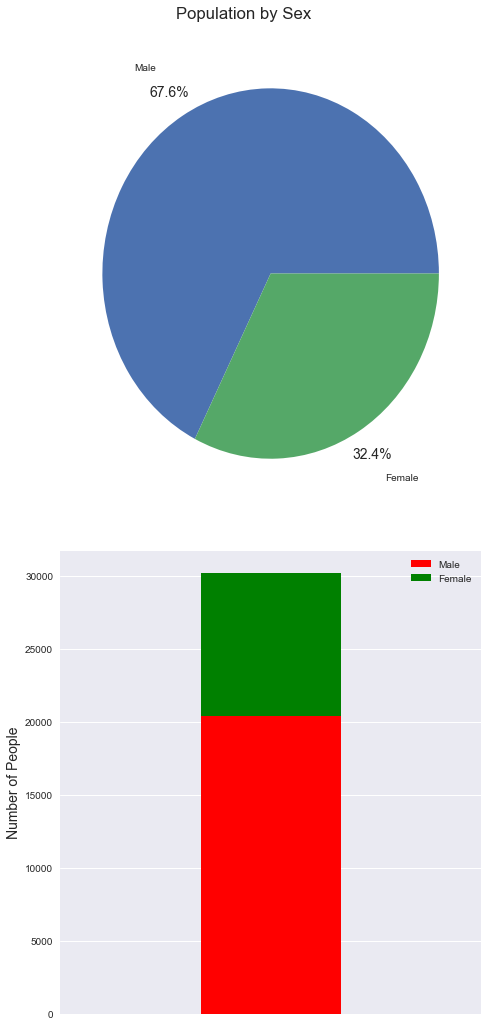

In [460]:
fracsS = list(adult['sex'].value_counts())
valuesS = list(adult['sex'].value_counts().index)
colorsS = ['r','g','k','b','y','c','m']
figS,axesS = plt.subplots(2,1,figsize =[7,14])
patches,texts,autotexts = axesS[0].pie(fracsS, labels = valuesS, autopct = '%1.1f%%', pctdistance=1.15, labeldistance = 1.3)

bar_width = .1
for x in range(len(fracsS)):
    axesS[1].bar(1,fracsS[x],width = bar_width, label = valuesS[x], color = colorsS[x], bottom = find_bottom(fracsS,x))
axesS[1].xaxis.set_visible(False) 
axesS[1].set_xlim(.85,1.15)
axesS[1].set_ylabel('Number of People')
handles, labels = axesS[1].get_legend_handles_labels()
axesS[1].legend(handles, labels)

figS.tight_layout()
figS.subplots_adjust(hspace=.1)
figS.suptitle('Population by Sex', y = 1.02)
plt.show()

### Interestingly, the population has significantly fewer female member than male members. Furthermore, the percentage of females earning under $50K is much higher than the number of males.

## How is the population segmented by native country?

In [466]:
country={}
for ind in adult[adult['over_50k'] == '>50K']['native_country'].value_counts().index:
    country[ind] = adult[adult['native_country'] == ind]['over_50k'].value_counts()
countrydf = pd.DataFrame(country)
countrydf = countrydf.append(countrydf.iloc[0,:]/(countrydf.iloc[0,:]+countrydf.iloc[1,:]),ignore_index=True)
countrydf = countrydf.transpose()
countrydf[[0,1]]=countrydf[[0,1]].astype(int)
countrydf[2] = round(countrydf[2]*100,1)
countrydf = countrydf.sort_values(2, ascending = False)
countrydf.columns = ['Under 50K', 'Over 50K', '% under 50K']
countrydf.head(10)

,Under 50K,Over 50K,% under 50K
Dominican-Republic,65,2,97.0
Columbia,54,2,96.4
Guatemala,60,3,95.2
Mexico,577,33,94.6
Nicaragua,31,2,93.9
Peru,28,2,93.3
Vietnam,59,5,92.2
Honduras,11,1,91.7
El-Salvador,91,9,91.0
Haiti,38,4,90.5


## How is the population distributed by age?

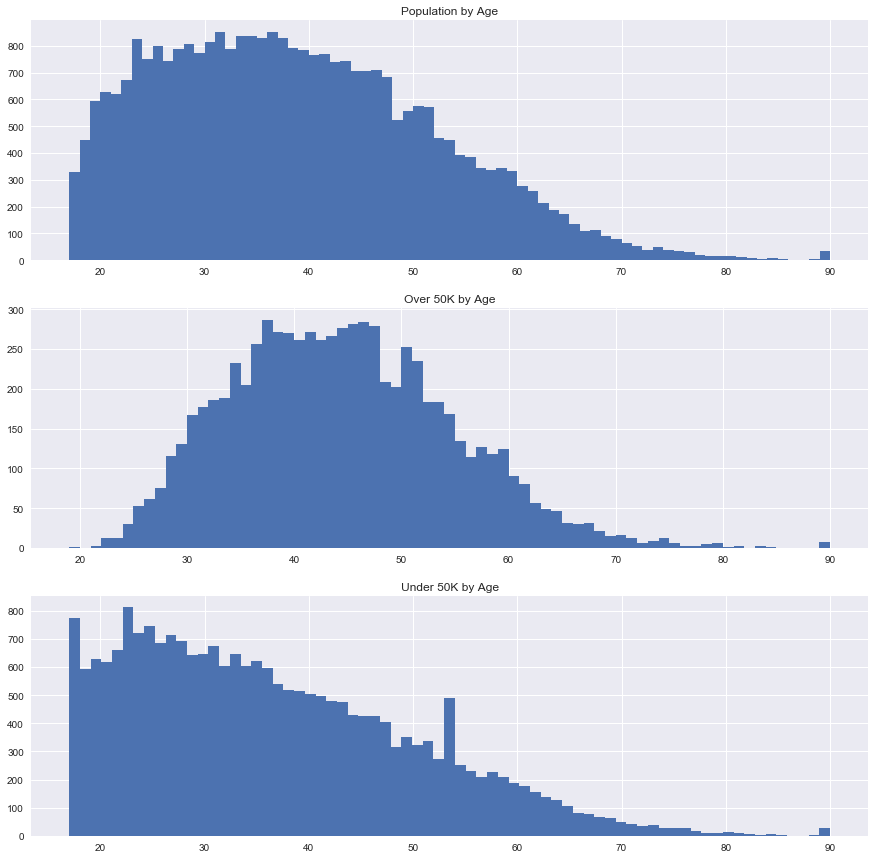

In [519]:
figAge, axesAge = plt.subplots(3,1,figsize=(15,15))
axesAge[0].hist(adult['age'], bins = adult['age'].max()-adult['age'].min())
axesAge[0].set_title('Population by Age')
axesAge[1].hist(adult[adult['over_50k'] == '>50K' ]['age'],bins = adult[adult['over_50k'] == '>50K' ]['age'].max() - adult[adult['over_50k'] == '>50K' ]['age'].min())
axesAge[1].set_title('Over 50K by Age')
axesAge[2].hist(adult[adult['over_50k'] == '<=50K' ]['age'],bins = adult[adult['over_50k'] == '>50K' ]['age'].max() - adult[adult['over_50k'] == '>50K' ]['age'].min())
axesAge[2].set_title('Under 50K by Age')

plt.show()

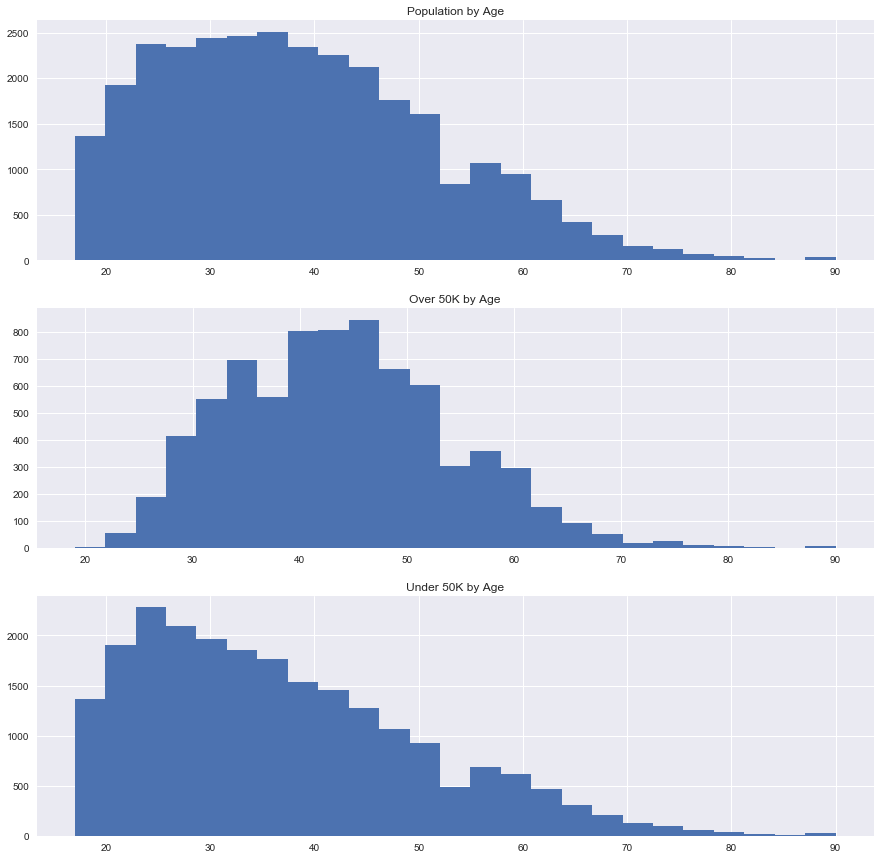

In [521]:

figAge, axesAge = plt.subplots(3,1,figsize=(15,15))
axesAge[0].hist(adult['age'], bins = 25)
axesAge[0].set_title('Population by Age')
axesAge[1].hist(adult[adult['over_50k'] == '>50K' ]['age'],bins = 25)
axesAge[1].set_title('Over 50K by Age')
axesAge[2].hist(adult[adult['over_50k'] == '<=50K' ]['age'],bins = 25)
axesAge[2].set_title('Under 50K by Age')

plt.show()

### The age distribution shows there is a right skew for the under 50K group. This finding makes sense because young adults and minors are unlikely to have a well-paying job due to lack of experience or have a job at all. 

## How is the population distributed by hours worked?

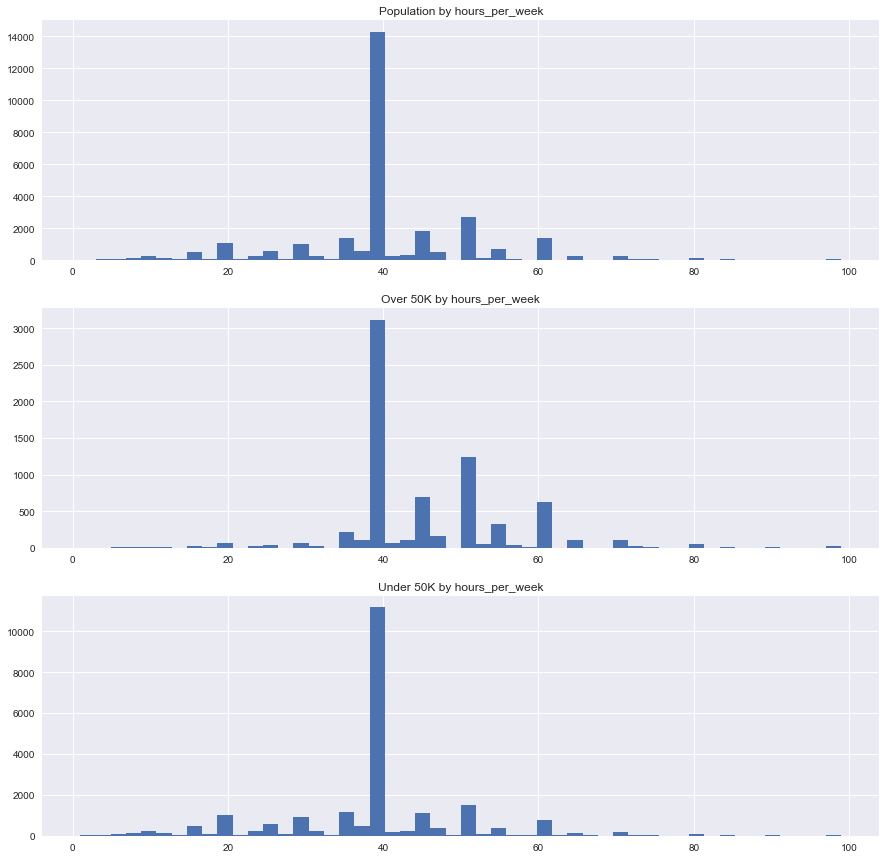

In [530]:
fighours_per_week, axeshours_per_week = plt.subplots(3,1,figsize=(15,15))
axeshours_per_week[0].hist(adult['hours_per_week'], bins = 50)
axeshours_per_week[0].set_title('Population by hours_per_week')
axeshours_per_week[1].hist(adult[adult['over_50k'] == '>50K' ]['hours_per_week'],bins =50)
axeshours_per_week[1].set_title('Over 50K by hours_per_week')
axeshours_per_week[2].hist(adult[adult['over_50k'] == '<=50K' ]['hours_per_week'],bins =50)
axeshours_per_week[2].set_title('Under 50K by hours_per_week')

plt.show()

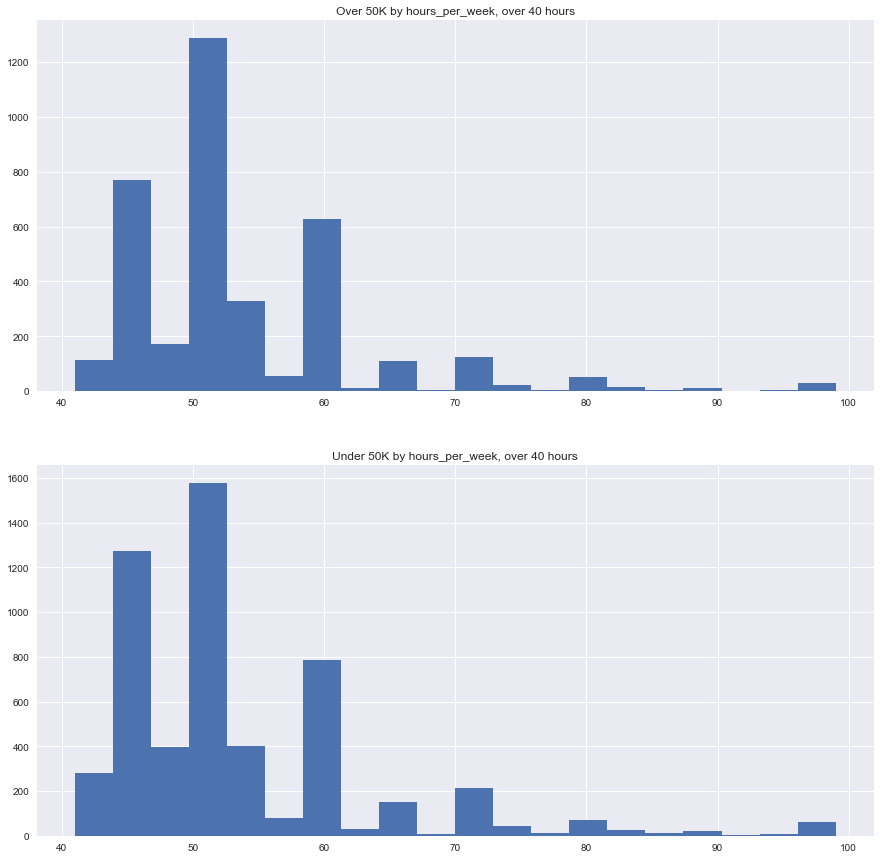

In [542]:
fighours_per_week, axeshours_per_week = plt.subplots(2,1,figsize=(15,15))
axeshours_per_week[0].hist(adult[np.logical_and(adult['over_50k'] == '>50K',adult['hours_per_week'] > 40)]['hours_per_week'],bins =20)
axeshours_per_week[0].set_title('Over 50K by hours_per_week, over 40 hours')
axeshours_per_week[1].hist(adult[np.logical_and(adult['over_50k'] == '<=50K',adult['hours_per_week'] > 40)]['hours_per_week'],bins =20)
axeshours_per_week[1].set_title('Under 50K by hours_per_week, over 40 hours')

plt.show()

### The distributions do not seem to suggest that working longer hours results in a higher likelihood of earning more than $50k.

## How is the population distributed by capital gains and losses?

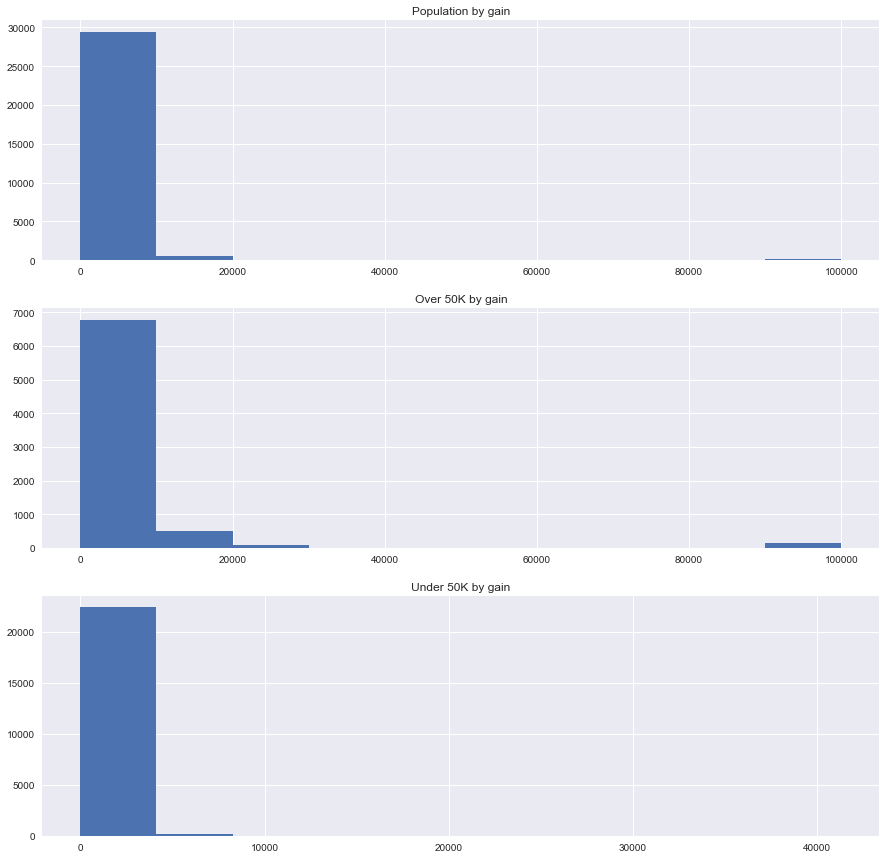

In [555]:
figgain, axesgain = plt.subplots(3,1,figsize=(15,15))
axesgain[0].hist(adult['capital_gain'], bins = 10)
axesgain[0].set_title('Population by gain')
axesgain[1].hist(adult[adult['over_50k'] == '>50K' ]['capital_gain'],bins =10)
axesgain[1].set_title('Over 50K by gain')
axesgain[2].hist(adult[adult['over_50k'] == '<=50K' ]['capital_gain'],bins =10)
axesgain[2].set_title('Under 50K by gain')

plt.show()

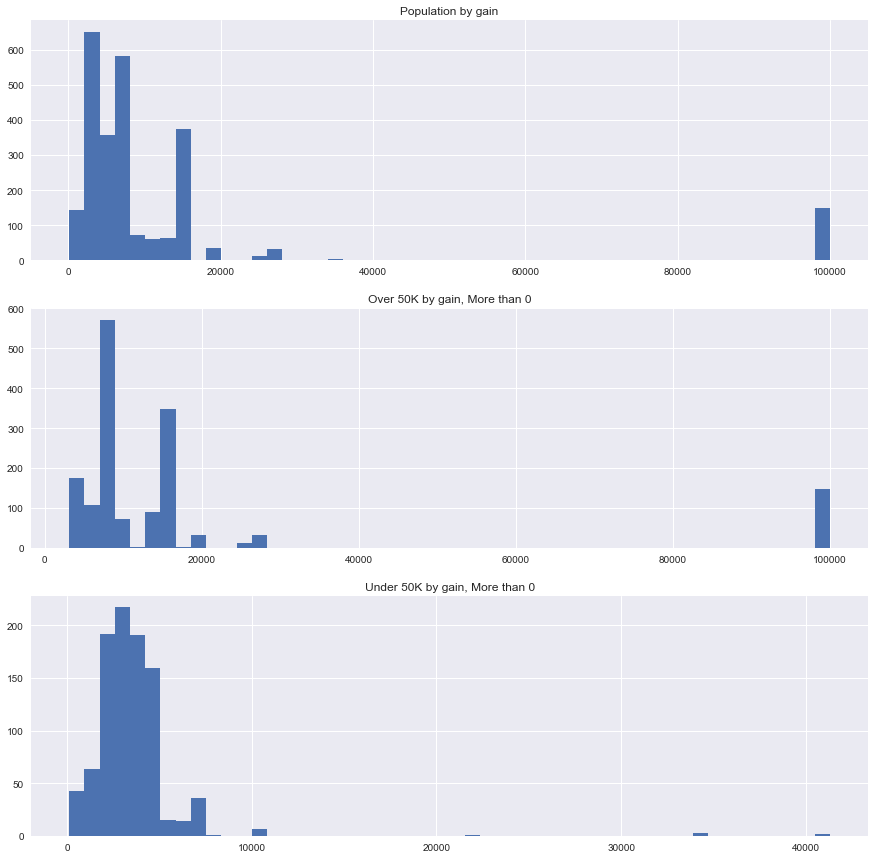

In [593]:
figgain, axesgain = plt.subplots(3,1,figsize=(15,15))
axesgain[0].hist(adult[adult['capital_gain'] > 0]['capital_gain'], bins = 50)
axesgain[0].set_title('Population by gain')
axesgain[1].hist(adult[np.logical_and(adult['over_50k'] == '>50K',adult['capital_gain'] > 0)]['capital_gain'],bins =50)
axesgain[1].set_title('Over 50K by gain, More than 0')
axesgain[2].hist(adult[np.logical_and(adult['over_50k'] == '<=50K',adult['capital_gain'] > 0)]['capital_gain'],bins =50)
axesgain[2].set_title('Under 50K by gain, More than 0')

plt.show()

In [588]:
gain = [[adult[np.logical_and(adult['over_50k'] == '>50K', adult['capital_gain'] > 0)]['capital_gain'].count(),\
             adult[np.logical_and(adult['over_50k'] == '>50K', adult['capital_gain'] == 0)]['capital_gain'].count()],\
       [adult[np.logical_and(adult['over_50k'] == '<=50K', adult['capital_gain'] > 0)]['capital_gain'].count(),\
             adult[np.logical_and(adult['over_50k'] == '<=50K', adult['capital_gain'] == 0)]['capital_gain'].count()]]
gaindf = pd.DataFrame(gain)
gaindf['%'] = gaindf.iloc[:,0]/(gaindf.iloc[:,0]+gaindf.iloc[:,1])
gaindf.iloc[:,2] = round(gaindf.iloc[:,2]*100,1)
gaindf.columns = ['Greater than 0 Capital Gains', 'No Capital Gains', '% with Gains']
gaindf.index = ['Over 50K', 'Under 50K']

gaindf

,Greater than 0 Capital Gains,No Capital Gains,% with
Under 50K,1595,5913,21.2
Over 50K,943,21711,4.2


In [592]:
loss = [[adult[np.logical_and(adult['over_50k'] == '>50K', adult['capital_loss'] > 0)]['capital_loss'].count(),\
             adult[np.logical_and(adult['over_50k'] == '>50K', adult['capital_loss'] == 0)]['capital_loss'].count()],\
       [adult[np.logical_and(adult['over_50k'] == '<=50K', adult['capital_loss'] > 0)]['capital_loss'].count(),\
             adult[np.logical_and(adult['over_50k'] == '<=50K', adult['capital_loss'] == 0)]['capital_loss'].count()]]
lossdf = pd.DataFrame(loss)
lossdf['%'] = lossdf.iloc[:,0]/(lossdf.iloc[:,0]+lossdf.iloc[:,1])
lossdf.iloc[:,2] = round(lossdf.iloc[:,2]*100,1)
lossdf.columns = ['Capital losses', 'No Capital losses', '% with Losses']
lossdf.index = ['Over 50K', 'Under 50K']

lossdf

,Capital losses,No Capital losses,% with Losses
Over 50K,737,6771,9.8
Under 50K,690,21964,3.0


### People with capital gains are losses more often earn over $50K. This finding makes sense because people with higher incomes are more likely to have investments that incur capital gains and losses. The distributions of gains and losses for each income group do not present any immediately obvious information.